In [2]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import MiniBatchKMeans
import glob
from helpersCV import *

# Pipeline

1. Load images
2. Create Average Color palettes for different emotions
3. Apply the changes in a specific order
4. Extract and transfer brightness, contrast

#### Load all the images from dataset

In [3]:

path_happy = 'images/sub_100_happy'
path_fear  = 'images/sub_100_fear'
path_sad   = 'images/sub_100_sad'
path_calm  = 'images/sub_100_calm'

fear_images  = load_images(path_fear)
happy_images = load_images(path_happy)
sad_images   = load_images(path_sad)
calm_images  = load_images(path_calm)

print("Images loaded ! ")
images = [happy_images,sad_images,fear_images,calm_images]
num_of_colors = 5

fear_palette, fear_contrast, fear_colorfulness, fear_luminance = extract_features(fear_images,num_of_colors)
happy_palette, happy_contrast, happy_colorfulness, happy_luminance = extract_features(happy_images,num_of_colors)
sad_palette, sad_contrast, sad_colorfulness, sad_luminance = extract_features(sad_images,num_of_colors)
calm_palette, calm_contrast, calm_colorfulness, calm_luminance = extract_features(calm_images,num_of_colors)

print("Features extracted  !")
palettes = [happy_palette,sad_palette,fear_palette,calm_palette]
contrasts = [happy_contrast,sad_contrast,fear_contrast,calm_contrast]
colorfulness = [happy_colorfulness,sad_colorfulness,fear_colorfulness,calm_colorfulness]
luminances = [happy_luminance,sad_luminance,fear_luminance,calm_luminance]
features = [palettes,contrasts,colorfulness,luminances]

Images loaded ! 


d:\EPFL\Master\MA2\Computer photography\Proyecto\helpersCV.py:103: RuntimeWarning: invalid value encountered in true_divide
  contrast = (max-min)/(max+min)


Features extracted  !


### Order of transfers : 
- color
- contrast
- colorfulness
- luminance

d:\EPFL\Master\MA2\Computer photography\Proyecto\helpersCV.py:252: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


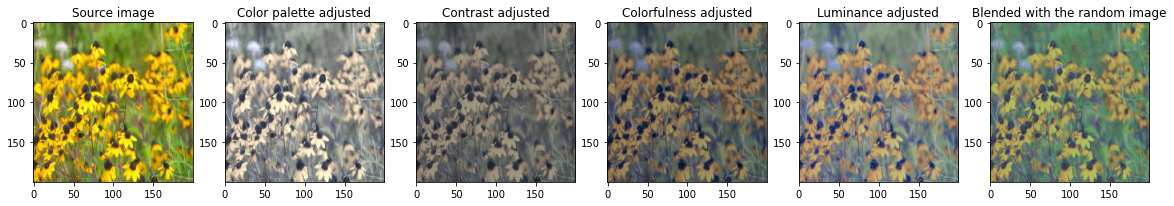

In [4]:
emotion = 'calm'
image = get_random_image(images[ed['happy']])
random_image = get_random_image(images[ed[emotion]])
modified_image = pipeline(image,emotion, [random_image], features,num_of_colors,True)

### Produce color images

In [33]:
random_happy_img = get_random_image(happy_images)
random_happy_palette = extract_palette(random_happy_img, num_of_colors)
random_fear_img = get_random_image(fear_images)
random_fear_palette = extract_palette(random_fear_img, num_of_colors)

In [34]:
w = [1/3, 1/3, 1/3]
final_color_fear_images = []
final_color_happy_images = []
for i, source_img in enumerate(neutral_images):
    avg_fear = color_transfer(source_img, fear_palette)
    random_fear = color_transfer(source_img, random_fear_palette)
    final_color_fear = change_opacity(source_img, w[0]) + change_opacity(avg_fear, w[1]) + change_opacity(random_fear, w[2])
    final_color_fear_images.append(final_color_fear)
    cv.imwrite('Image Research/neutral_to_fear/img'+str(i)+".jpg", final_color_fear) 
    
    avg_happy = color_transfer(source_img, happy_palette)
    random_happy = color_transfer(source_img, random_happy_palette)
    final_color_happy = change_opacity(source_img, w[0]) + change_opacity(avg_happy, w[1]) + change_opacity(random_happy, w[2])
    final_color_happy_images.append(final_color_happy)
    cv.imwrite('Image Research/neutral_to_happy/img'+str(i)+".jpg", final_color_happy) 

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


ValueError: cannot convert float NaN to integer